In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
colg=pd.read_csv('D:\cluster_example.csv')

In [ ]:
colg.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [ ]:
# distance so we need to standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# instance of the class

scaler=StandardScaler()

In [ ]:
# remove the first var

colg_1=colg.drop('Univ',axis=1)

In [ ]:
# scale the df

colg_sc=scaler.fit_transform(colg_1)

In [ ]:
colg_sc

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [ ]:
# mean for all the columns
colg_sc.mean(axis=0)

array([-5.15143483e-16, -2.08721929e-16, -1.33226763e-16, -1.90958360e-16,
       -8.88178420e-18,  1.42108547e-16])

In [ ]:
# sd for all the columns
colg_sc.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

In [ ]:
# hierarchical clustering on this dataset

# linkage - complete,single,centroid etc
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

In [ ]:
link=linkage(colg_sc,method='ward')

In [ ]:
colg.shape

(25, 7)

In [ ]:
import matplotlib.pyplot as plt

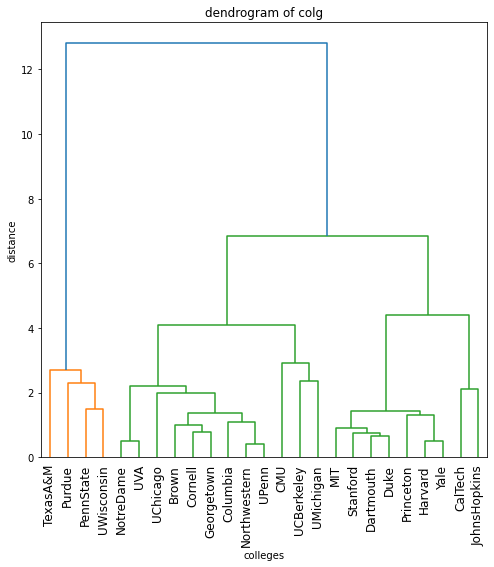

In [ ]:
# we will create a dendrogram 
plt.figure(figsize=(8,8))
plt.xlabel('colleges')
plt.ylabel('distance')
plt.title('dendrogram of colg')
lab=np.array(colg['Univ'])
dendrogram(link,labels=lab,leaf_font_size=12,leaf_rotation=90);

In [ ]:
# fcluster (linkage,t=n,criterion='maxclust')

# t - create not more than n flat clusters (4 in this eg)

In [ ]:
# this gives us which obs goes to which cluster
clus_flat=fcluster(link,t=4,criterion='maxclust')

In [ ]:
clus_flat

array([2, 4, 2, 2, 2, 3, 3, 2, 3, 4, 3, 2, 2, 1, 3, 1, 3, 1, 2, 2, 2, 2,
       2, 1, 3], dtype=int32)

In [ ]:
# assign this to the df

colg_cluster=colg.assign(Cluster=clus_flat)

In [ ]:
colg_cluster

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,4


In [ ]:
# cluster demographics


colg_cluster.groupby('Cluster')['Univ'].count()

Cluster
1     4
2    12
3     7
4     2
Name: Univ, dtype: int64

In [ ]:

colg_cluster.groupby('Cluster')['Expenses'].mean()

Cluster
1     9953.000000
2    22858.000000
3    35475.142857
4    61133.000000
Name: Expenses, dtype: float64

In [ ]:
# partitive clustering - kmeans algorithm

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# init='kmeans'- selects random seed in such a way to speed up the convergence

# KMeans(n_clusters=no_of_clusters,init='k-means++',max_iter= no of iterations for convergence,n_init=no of times the kmeans will run for different centroids

In [ ]:
k_means=KMeans(n_clusters=4,init='k-means++',max_iter=50,n_init=10)

In [ ]:
k_means

KMeans(max_iter=50, n_clusters=4)

In [ ]:
# fit this kmeans on our data

k_means.fit(colg_sc)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
colg_sc.shape

(25, 6)

In [ ]:
# we get attributes for our kmeans class
# cluster center
k_means.cluster_centers_

array([[-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [ 0.80273428,  0.68086062, -0.90136381, -0.43159988,  0.44062556,
         0.79526289],
       [ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ]])

In [ ]:
# total SS for the 4 clusters combined
k_means.inertia_

33.654341806512235

In [ ]:
# which points go to which cluster
k_means.labels_

array([2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [ ]:
# optimum no of clusters

In [ ]:
# plot the inertia with respect to the no of clusters

cluster_range=range(1,15)

In [ ]:
#KMeans(n_clusters= range, init='k-means++',max_iter=30,n_init=10))

In [ ]:
SSW=[]

In [ ]:
for i in cluster_range:
    clus_model=KMeans(i,max_iter=30,init='k-means++')
    clus_model.fit(colg_sc)
    SSW.append(clus_model.inertia_)

In [ ]:
SSW

[149.99999999999997,
 64.1452839501027,
 44.531761731450956,
 34.79612750585773,
 26.785713479514524,
 22.49301487603281,
 18.91299739748178,
 15.891199439075496,
 13.161014731247565,
 10.729002092323686,
 8.5680038214307,
 6.534490032010418,
 5.493016111483617,
 4.458973069782969]

In [ ]:
# assign this to a df

SSW_df=pd.DataFrame({'no_of_clusters':range(1,15),'SSWithin':SSW})

In [ ]:
SSW_df

,no_of_clusters,SSWithin
0,1,150.000000
1,2,64.145284
2,3,44.531762
3,4,34.796128
4,5,26.785713
5,6,22.493015
6,7,18.912997
7,8,15.891199
8,9,13.161015
9,10,10.729002


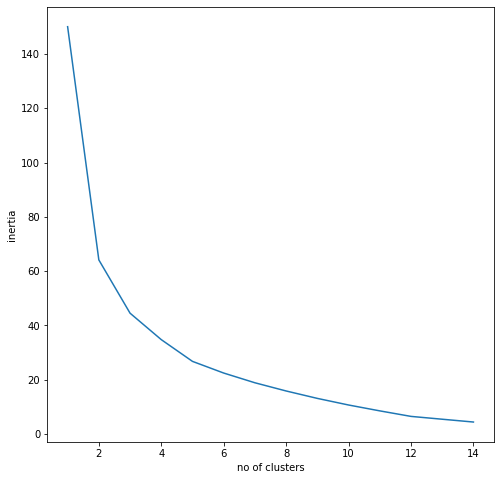

In [ ]:
plt.figure(figsize=(8,8))
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.plot(SSW_df['no_of_clusters'],SSW_df['SSWithin'])

### WEB SCRAPING

In [ ]:
# 1. dont use for commerical purpose

#2. one request per second for a webpage is ok

# 3. the layout of the page may change

In [ ]:
# scrape data from a wiki page using beautiful soup

In [ ]:
import requests

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
# give the url name

quote_page='https://en.wikipedia.org/wiki/List_of_state_and_union_territory_capitals_in_India'

In [ ]:
import urllib.request

In [ ]:
page=urllib.request.urlopen(quote_page)

In [ ]:
# status code - our webpage has been accessed

page.status

200

In [ ]:
# after accessing the webpage we want to parse the html file and store it in a object

In [ ]:
soup=BeautifulSoup(page,'html.parser')

In [ ]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of state and union territory capitals in India - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"96b1f61e-c7a0-4d86-a14e-138952abeb74","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_state_and_union_territory_capitals_in_India","wgTitle":"List of state and union territory capitals in India","wgCurRevisionId":1032689429,"wgRevisionId":1032689429,"wgArticleId":2371868,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from January 2021","Articles with shor

In [ ]:
# print it properly

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of state and union territory capitals in India - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"96b1f61e-c7a0-4d86-a14e-138952abeb74","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_state_and_union_territory_capitals_in_India","wgTitle":"List of state and union territory capitals in India","wgCurRevisionId":1032689429,"wgRevisionId":1032689429,"wgArticleId":2371868,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from January 2021","A

In [ ]:
# title of the webpage
soup.title

<title>List of state and union territory capitals in India - Wikipedia</title>

In [ ]:
# text 
soup.title.text

'List of state and union territory capitals in India - Wikipedia'

In [ ]:
soup.title.get_text()

'List of state and union territory capitals in India - Wikipedia'

In [ ]:
# hyperlink
soup.a

<a id="top"></a>

In [ ]:
# all the hyperlinks

# find all the a

soup.find_all('a')

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a href="/wiki/States_and_union_territories_of_India" title="States and union territories of India">States and union <br/> territories of India</a>,
 <a class="image" href="/wiki/File:Flag_of_India.svg"><img alt="Flag of India.svg" data-file-height="900" data-file-width="1350" decoding="async" height="47" src="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/70px-Flag_of_India.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/105px-Flag_of_India.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/140px-Flag_of_India.svg.png 2x" width="70"/></a>,
 <a href="/wiki/List_of_states_and_union_territories_of_India_by_area" title="List of states and union territories of India by area">Area</a>,
 <a href="/wiki/List_of_states_and_union_territories_of_India_by_population" tit

In [ ]:
# get all the tables

In [ ]:
soup.find_all('table')

[<table class="sidebar nomobile"><tbody><tr><th class="sidebar-title"><a href="/wiki/States_and_union_territories_of_India" title="States and union territories of India">States and union <br/> territories of India</a> <br/> ordered by</th></tr><tr><td class="sidebar-image"><div class="center"><div class="floatnone"><a class="image" href="/wiki/File:Flag_of_India.svg"><img alt="Flag of India.svg" data-file-height="900" data-file-width="1350" decoding="async" height="47" src="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/70px-Flag_of_India.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/105px-Flag_of_India.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/140px-Flag_of_India.svg.png 2x" width="70"/></a></div></div></td></tr><tr><td class="sidebar-content hlist">
 <ul><li><a href="/wiki/List_of_states_and_union_territories_of_India_by_area" title="List of states and union territories of India by area">Area</

In [ ]:
# extract the list of states and UTs


right_table=soup.find('table',{"class":'wikitable sortable plainrowheaders'})

In [ ]:
right_table

<table class="wikitable sortable plainrowheaders">
<caption>States
</caption>
<tbody><tr>
<th scope="col">No.
</th>
<th scope="col">State
</th>
<th scope="col">Administrative / Executive
<p>capital 
</p>
</th>
<th scope="col">Legislative capital
</th>
<th scope="col">Judicial capital
</th>
<th scope="col">Year of establishment
</th>
<th scope="col">Former capital
</th></tr>
<tr>
<td>1
</td>
<th scope="row"><a href="/wiki/Andhra_Pradesh" title="Andhra Pradesh">Andhra Pradesh</a>
</th>
<td><a href="/wiki/Visakhapatnam" title="Visakhapatnam">Visakhapatnam</a><sup class="reference" id="cite_ref-capitals_3-0"><a href="#cite_note-capitals-3">[3]</a></sup>
</td>
<td><a href="/wiki/Amaravati" title="Amaravati">Amaravati</a><sup class="reference" id="cite_ref-capitals_3-1"><a href="#cite_note-capitals-3">[3]</a></sup>
</td>
<td><a href="/wiki/Kurnool" title="Kurnool">Kurnool</a><sup class="reference" id="cite_ref-capitals_3-2"><a href="#cite_note-capitals-3">[3]</a></sup>
</td>
<td>1956
</td>
<

In [ ]:
# provide the output for that table into pd.read_html
df=pd.read_html(str(right_table))

In [ ]:
table_of_states=df[0]

In [ ]:
table_of_states

,No.,State,Administrative / Executive capital,Legislative capital,Judicial capital,Year of establishment,Former capital
0,1,Andhra Pradesh,Visakhapatnam[3],Amaravati[3],Kurnool[3],1956,Hyderabad[a](1956–2017) Amaravati (2017-2020)
1,2,Arunachal Pradesh,Itanagar,Itanagar,Guwahati,1987,—
2,3,Assam,Dispur,Dispur,Guwahati,1972,Shillong[b] (1950–1972)
3,4,Bihar,Patna,Patna,Patna,1950,—
4,5,Chhattisgarh,Naya Raipur [c],Raipur,Bilaspur,2000,—
5,6,Goa,Panaji [d],Porvorim,Mumbai,1987,—
6,7,Gujarat,Gandhinagar,Gandhinagar,Ahmedabad,1960,Ahmedabad (1960–1970)
7,8,Haryana,Chandigarh,Chandigarh,Chandigarh,1966,—
8,9,Himachal Pradesh,Shimla,Shimla (Summer)Dharamsala (Winter)[6],Shimla,1971,—
9,10,Jharkhand,Ranchi,Ranchi,Ranchi,2000,—


## Comcast project

In [ ]:
df=pd.read_csv(r'C:\Data Science with Python\New folder\Comcast_telecom_complaints_data.csv')

In [ ]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [ ]:
# convert the date to a datetime object
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [ ]:
# get the month using the date

df['month']=df['Date'].dt.month_name()

In [ ]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May


In [ ]:
# create a trend chart for daily and monthly


df['Date'].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-24      7
2015-05-02      7
2015-04-05      6
2015-04-11      5
2015-05-03      5
Name: Date, Length: 91, dtype: int64

In [ ]:
df['Date'].dt.month_name()

0       April
1       April
2       April
3         May
4         May
        ...  
2219    April
2220     June
2221     June
2222     June
2223     June
Name: Date, Length: 2224, dtype: object

In [ ]:
df.describe(include='all')

<ipython-input-119-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2,3
top,369429,Comcast,2015-06-24 00:00:00,24-Jun-15,8:24:30 AM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No,June
freq,1,83,218,218,2,1119,63,288,NaN,973,2021,1280
first,NaN,NaN,2015-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN,NaN


In [ ]:
# complaints data at daily level


dates=df.groupby('Date')['Ticket #'].count()

In [ ]:
daily=pd.DataFrame(dates).reset_index()

In [ ]:
daily.head()

,Date,Ticket #
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6


<AxesSubplot:xlabel='Date'>

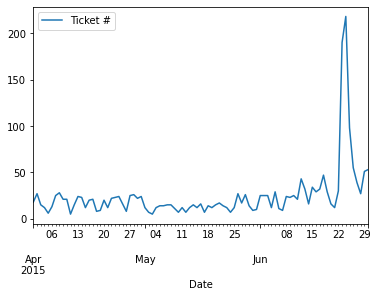

In [ ]:
daily.plot(x='Date',y='Ticket #',kind='line')

In [ ]:
# monthly complaint levels

mnth=pd.DataFrame(df.groupby('month')['Ticket #'].count()).reset_index()
mnth

,month,Ticket #
0,April,545
1,June,1280
2,May,399


<AxesSubplot:xlabel='month'>

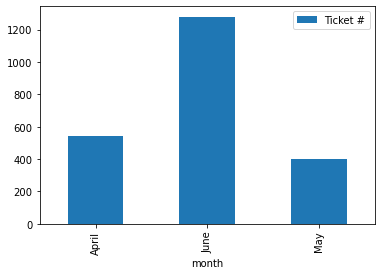

In [ ]:
mnth.plot(x='month',y='Ticket #',kind='bar')

In [ ]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May


In [ ]:
df['Customer Complaint']

0                           Comcast Cable Internet Speeds
1            Payment disappear - service got disconnected
2                                       Speed and Service
3       Comcast Imposed a New Usage Cap of 300GB that ...
4              Comcast not working and no service to boot
                              ...                        
2219                                 Service Availability
2220           Comcast Monthly Billing for Returned Modem
2221                              complaint about comcast
2222               Extremely unsatisfied Comcast customer
2223                 Comcast, Ypsilanti MI Internet Speed
Name: Customer Complaint, Length: 2224, dtype: object

In [ ]:
df[df['Customer Complaint'].str.contains('speed',case=False)].shape[0]/len(df['Customer Complaint'])*100

8.633093525179856

In [ ]:
def get_keyword(topic):
    return df[df['Customer Complaint'].str.contains(topic,case=False)].shape[0]/len(df['Customer Complaint'])*100
    

In [ ]:
get_keyword('speed')

8.633093525179856

In [ ]:
get_keyword('service')

21.987410071942445

In [ ]:
get_keyword('bill')

17.04136690647482

In [ ]:
get_keyword('disconnect')

0.8093525179856115

In [ ]:
get_keyword('network')

0.08992805755395684

In [ ]:
## Principal component analysis

In [ ]:
# lower the dimensionality of data

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer=load_breast_cancer()

In [ ]:
type(cancer)

sklearn.utils.Bunch

In [ ]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# into a df

df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

In [ ]:
df_sc=scale.fit_transform(df)

In [ ]:
# PCA

from sklearn.decomposition import PCA

In [ ]:
# no of components=2

pca=PCA(n_components=2)

In [ ]:
# fit the PCA on data


a=pca.fit_transform(df_sc)
a

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [ ]:


df.shape

(569, 30)

Text(0, 0.5, 'second prin comp')

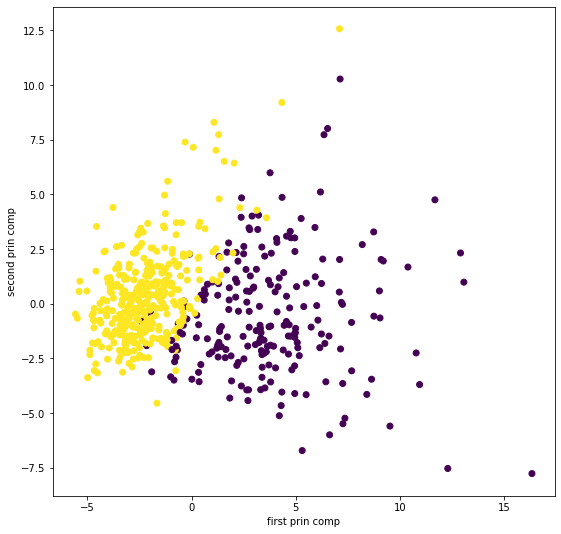

In [ ]:
# plot this on a figure

plt.figure(figsize=(9,9))

plt.scatter(a[:,0],a[:,1],c=cancer['target'])
plt.xlabel('first prin comp')
plt.ylabel('second prin comp')


In [ ]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [ ]:
# explained variance

pca.explained_variance_

array([13.30499079,  5.7013746 ])

In [ ]:
# explained variance ratio 

pca.explained_variance_ratio_

array([0.44272026, 0.18971182])